In [2]:
# попробем обучить модель для определения качества яблок с помощью логарифмической регессии и случайного леса
# загружаем модуль
import f1 as dd

In [3]:
# загрузим данные
data = dd.load_csv("apple_quality.csv")

In [4]:
# посмотрим на данные
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


Здесь мы видим что поле Quality содержит текст, который можно представить в виде чисел

In [5]:
# Информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Acidity и Quality надо поменять тип данных

In [6]:
# Базовая статистика
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


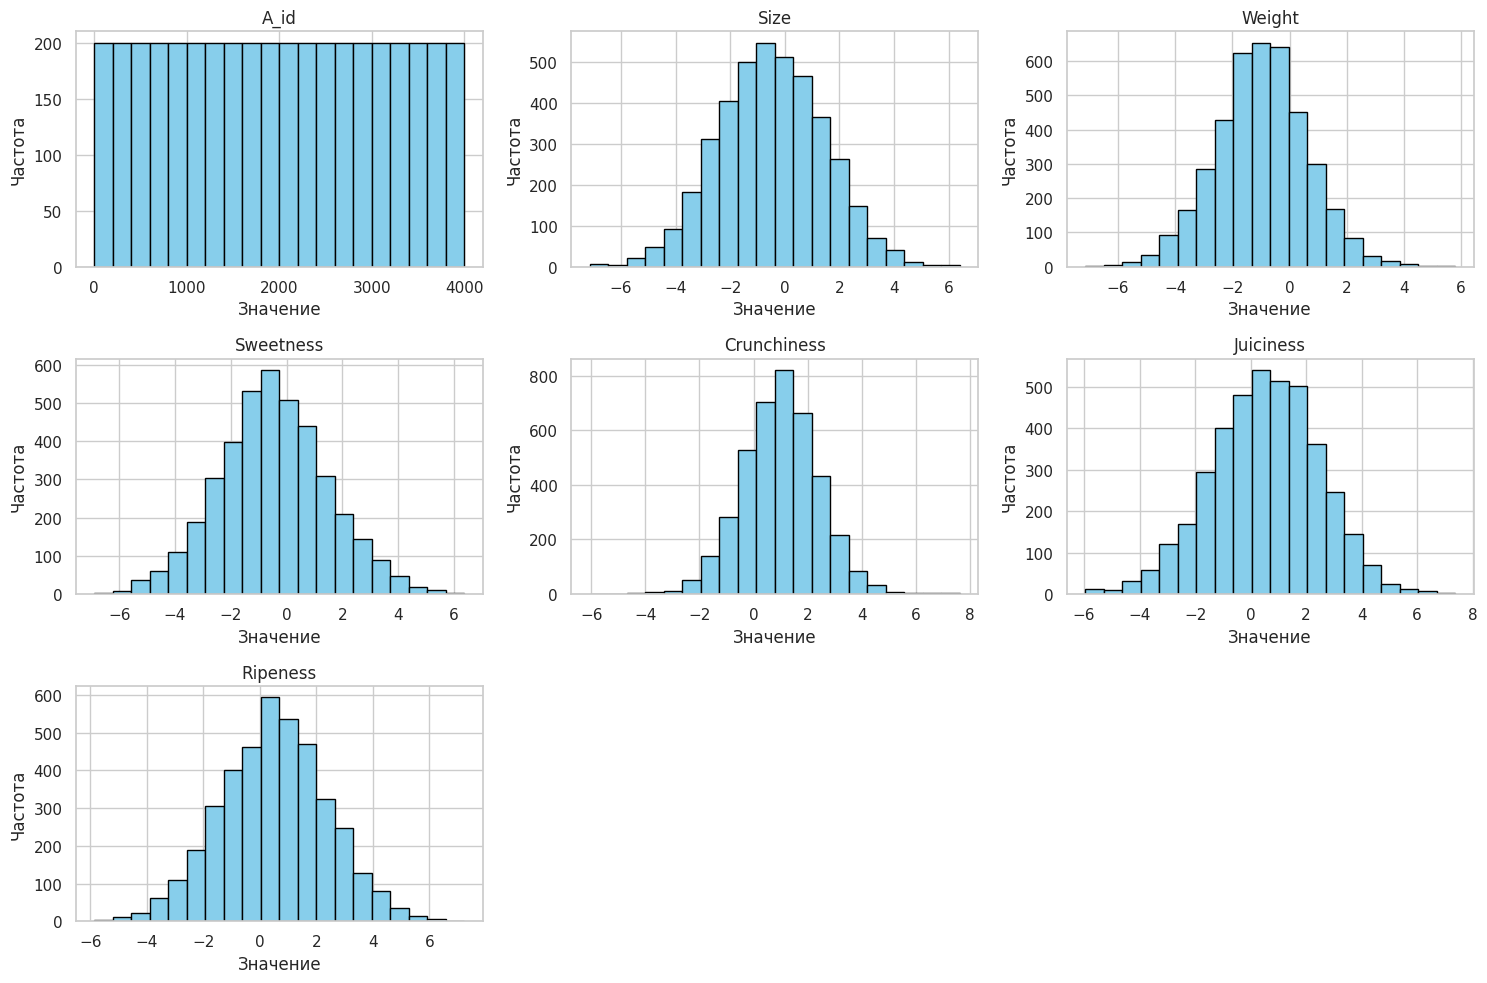

In [7]:
# посмотрим на столбчатую диаграмму (увидим что A_id нам не нужно)
dd.viev2(data)

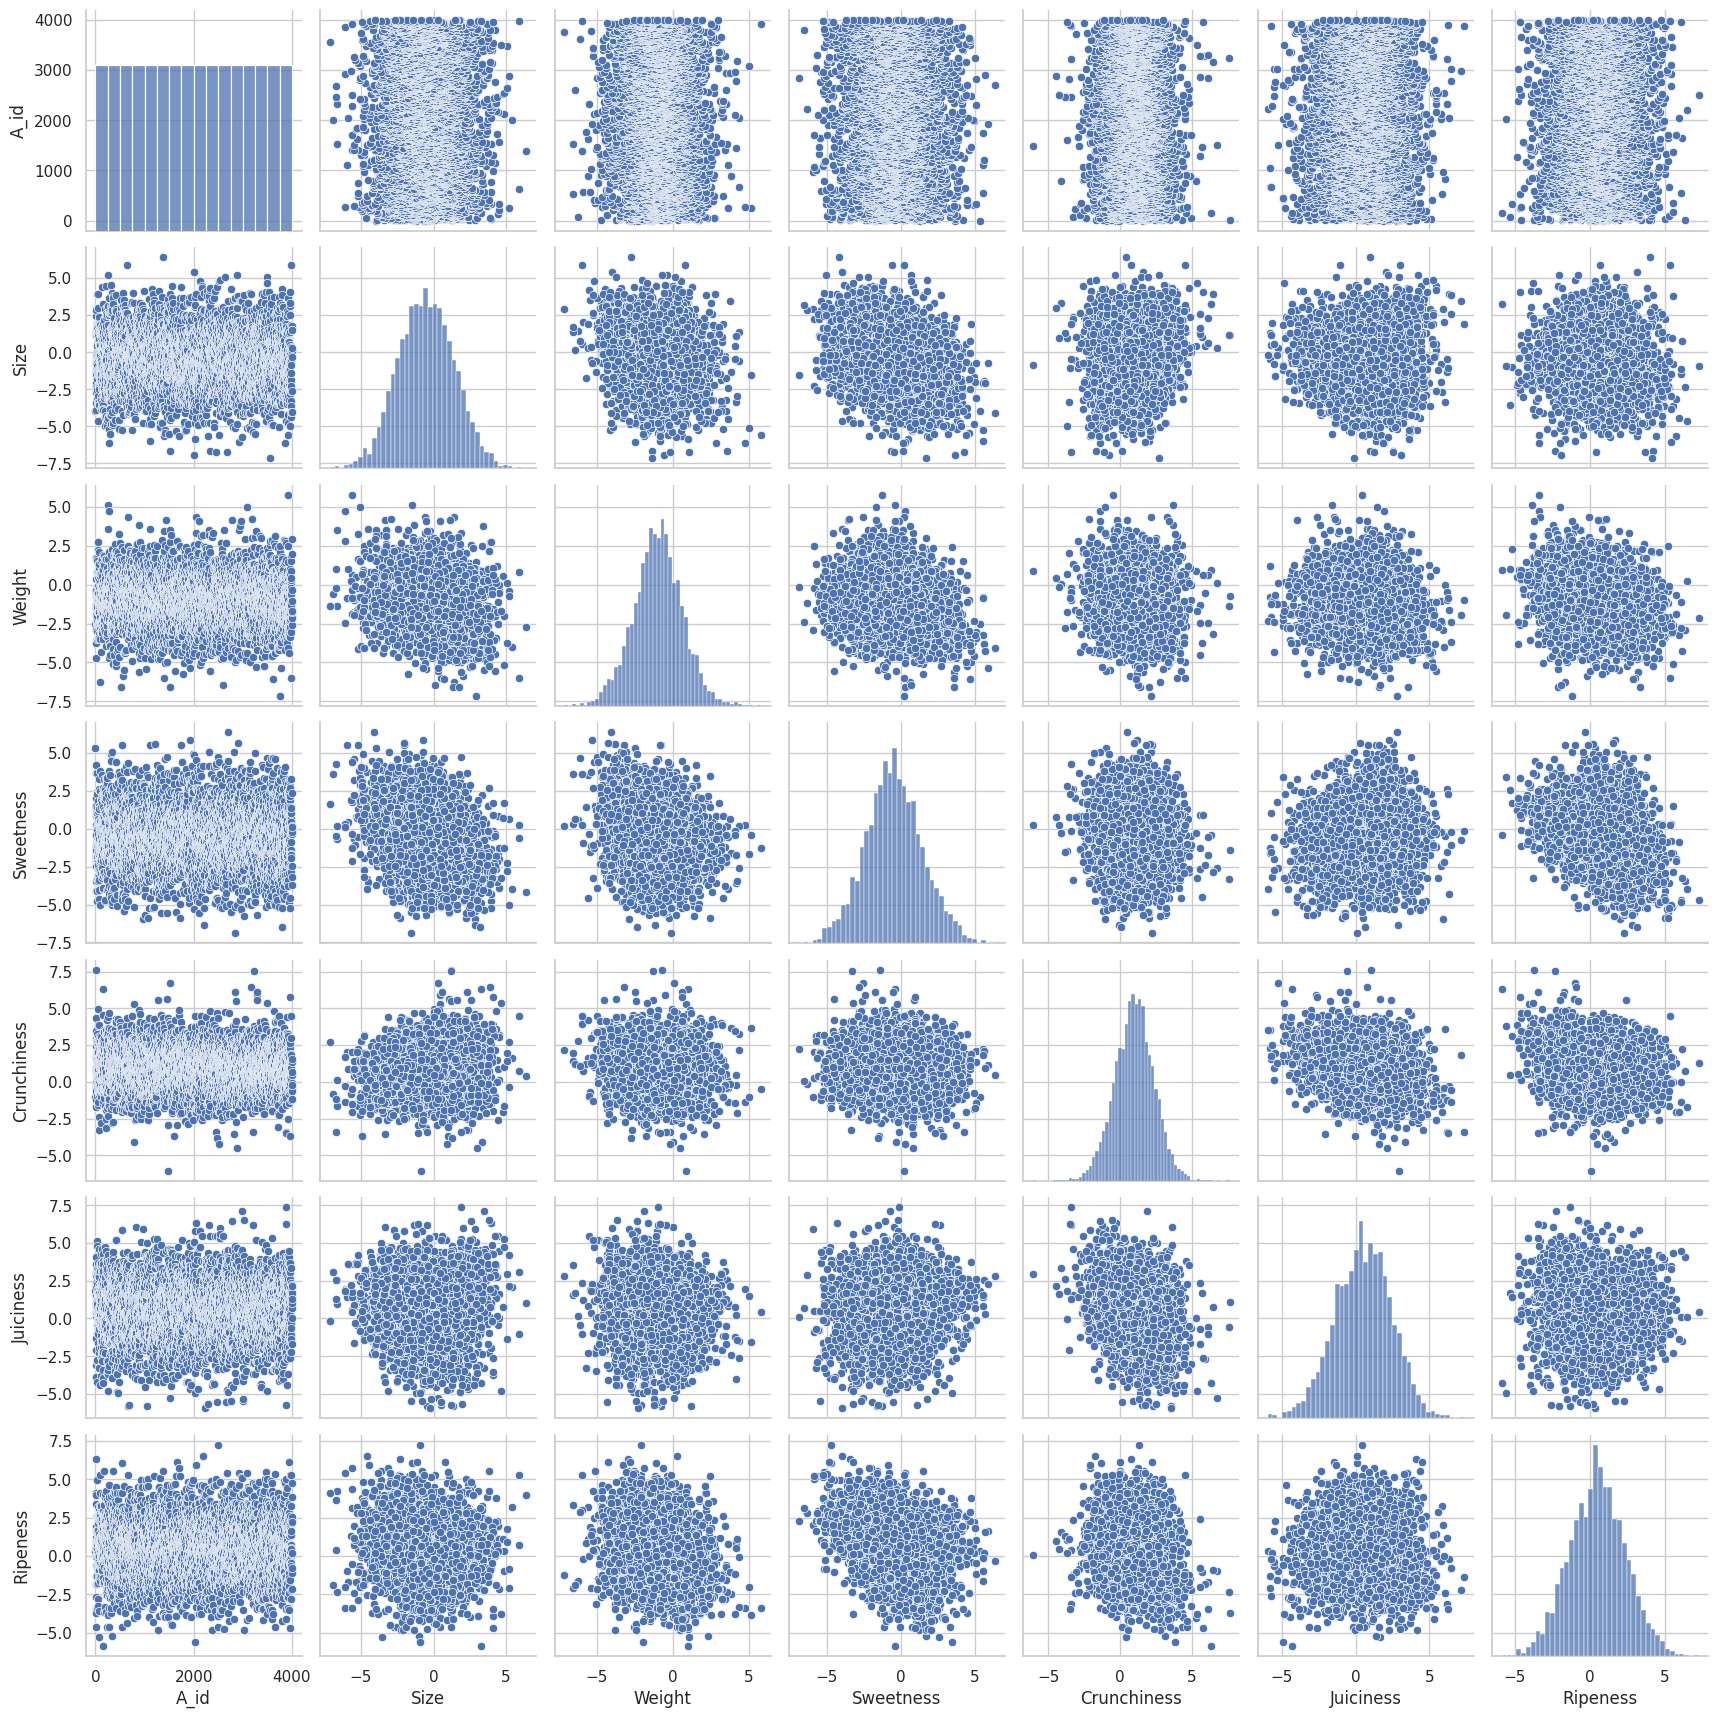

In [8]:
# не совсем удачная попытка построить диаграмму рассеивания
dd.viev1(data)

In [10]:
#собственно, само преоразование данных (удаление поля, замена типов данных и удаление строк с хотя ды одним пустым значением)
data1 = dd.clean_data(data.copy())
data1.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


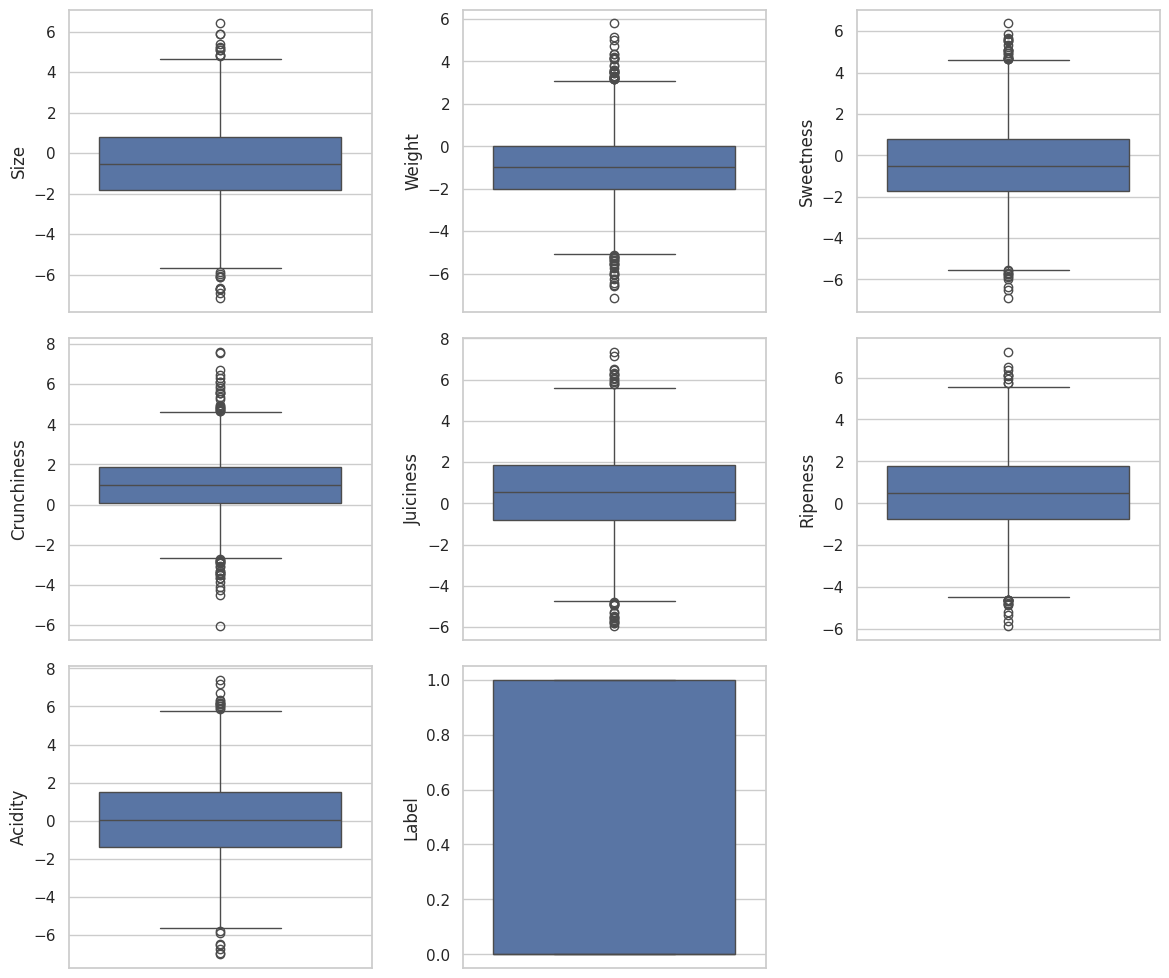

In [11]:
#строим диаграмму ящик с усами (видим что много выбросов, но пока делать с ними ничего не будем)
dd.viev(data1)


In [12]:
#обучение и вывод статистики о модели
dd.learning(data1)

0.7633333333333333 0.8941666666666667               precision    recall  f1-score   support

           0       0.75      0.80      0.77       601
           1       0.78      0.73      0.75       599

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       601
           1       0.90      0.88      0.89       599

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



In [ ]:
"""получили результат 75% по линейной регессии и 89% по случайному лесу.
   результат слабоват, по цифрам лучше себя покаал лес.
   Для улучшения результата необходимо либо работать с выбосами либо пробовать другую модель обучения..."""